In [1]:
Q0 = 100
c0 = 1
life_years = 40
build_years = 3
Ibar = -15
r = 0.05
pi0 = 3

Qmax = 200
Q_intuitivo = 200
Q_values = collect(0:200);


##### Questão 4 - Item A

In [2]:
# import Pkg
# Pkg.add("NPFinancial")
using NPFinancial

I = Ibar * Q_intuitivo
c = 0.01 * Q_intuitivo^2
profit_f0 = (pi0- c0)*Q0
profit_f1 = pi0 * Q_intuitivo - c

f0_flow = fill(profit_f0, build_years+life_years)
f1_flow =[fill(I,build_years); fill(profit_f1,life_years)]
agg_flow = f0_flow.+f1_flow

agg_npv = npv(r,agg_flow)

######### PRINT RESULTS #########
println("Agg Factory NPV: \$", round(agg_npv, digits=2))
if agg_npv < 0
    println("NEGATIVE NPV - NON OPTIMAL DECISION (Q=", Q_intuitivo, ")")
else
    println("POSITIVE NPV - OPTIMAL DECISION (Q=", Q_intuitivo, ")")
end

Agg Factory NPV: $-1780.83
NEGATIVE NPV - NON OPTIMAL DECISION (Q=200)


##### Questão 4 - Item C

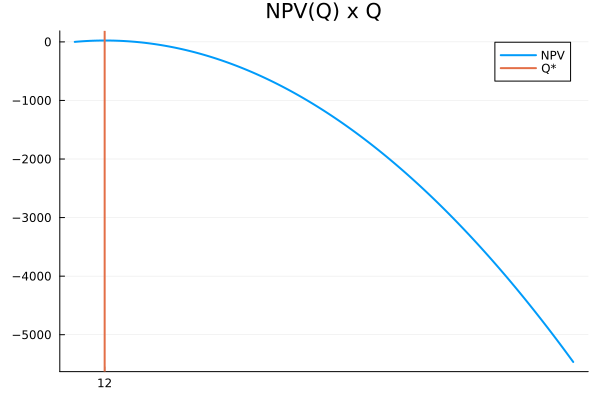

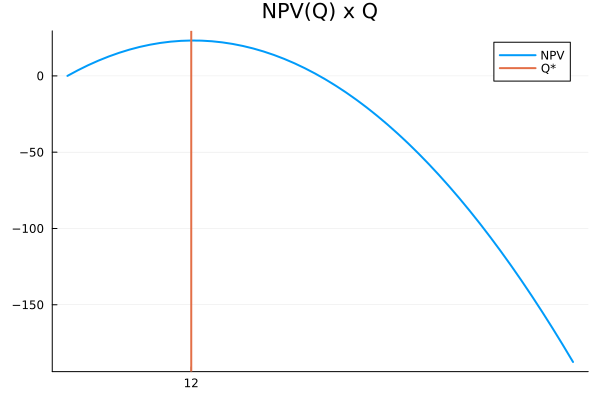

In [11]:
npv_values = []

for q in Q_values
    i = -15 * q ; k = 0.01 * q^2 ; p = pi0*q - k
    flow =[fill(i,build_years); fill(p,life_years)]
    agg_npv = npv(r,flow)
    append!(npv_values, round(agg_npv, digits=2))
end

max_npv, max_Q = findmax(npv_values)

####### Plot Results #######
using Plots
p1 = plot(Q_values, npv_values, title = "NPV(Q) x Q", label="NPV", linewidth=2)
p2 = plot(Q_values[1:50], npv_values[1:50], title = "NPV(Q) x Q", label="NPV", linewidth=2)
plot!(p1,[Q_values[max_Q]], seriestype="vline", linewidth=2, xticks=[Q_values[max_Q]], label="Q*")
plot!(p2,[Q_values[max_Q]], seriestype="vline", linewidth=2, xticks=[Q_values[max_Q]], label="Q*")

display(p1)
display(p2)
savefig(p1, "q4b_VPxQ.png");
savefig(p2, "q4b_VPxQ_zoom.png");


##### Questão 4 - Item D

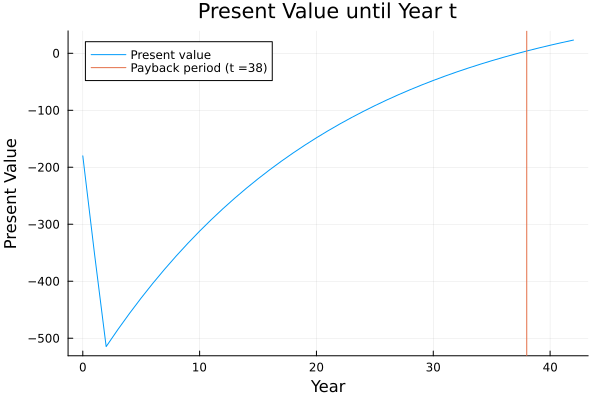

Payback period: Year 38


"d:\\Documentos\\PUC\\Doutorado\\2024.1\\ADR\\lista1\\q4d_paybackQopt.png"

In [13]:
q = Q_values[max_Q] #12
i = Ibar * q ; k = 0.01 * q^2 ; p = pi0*q - k
payback_period = 0
cumulative_cash_flow = 0.0
# Calculate discounted cash flows and accumulate them until the cumulative cash flow becomes positive
for t in 1: (build_years + life_years - 1)
    if t <= (build_years - 1)
        discounted_cash_flow = i / (1 + r)^t
    else
        discounted_cash_flow = p / (1 + r)^t
    end

    cumulative_cash_flow += discounted_cash_flow
    if cumulative_cash_flow + i >= 0
        payback_period = t
        break
    end
end

# Print the payback period
if payback_period > 0
    println("Payback period: Year ", payback_period)
else
    println("Payback period not reached within the analysis horizon.")
end

# Plot the present value until year t
present_value = zeros(build_years+life_years)
for t in 0:(build_years+life_years-1)
    if t <= (build_years - 1)
        present_value[t+1] = sum(i / (1 + r)^j for j in 0:t)
    else
        present_value[t+1] = sum(i / (1 + r)^j for j in 0:(build_years-1)) + sum(p / (1 + r)^j for j in build_years:t)
    end
end

p1 = plot(0:(build_years+life_years-1), present_value, xlabel="Year", ylabel="Present Value",
     title="Present Value until Year t", label = "Present value")
plot!(p1, [payback_period], seriestype="vline", label="Payback period (t =$payback_period)")
display(p1)

savefig(p1, "q4d_paybackQopt.png");



##### Questão 4 - Item E

In [24]:
q = 200
i = Ibar * q ; k = 0.01 * q^2 ; p = pi0*q - k
payback_period = 0
cumulative_cash_flow = 0.0
# Calculate discounted cash flows and accumulate them until the cumulative cash flow becomes positive
for t in 1: (build_years + life_years - 1)
    if t <= (build_years - 1)
        discounted_cash_flow = i / (1 + r)^t
    else
        discounted_cash_flow = p / (1 + r)^t
    end

    cumulative_cash_flow += discounted_cash_flow
    if cumulative_cash_flow + i >= 0
        payback_period = t
        break
    end
end

# Print the payback period
if payback_period > 0
    println("Payback period: Year ", payback_period)
else
    println("Payback period not reached within the analysis horizon.")
end

Payback period not reached within the analysis horizon.


##### Questão 4 - Item F

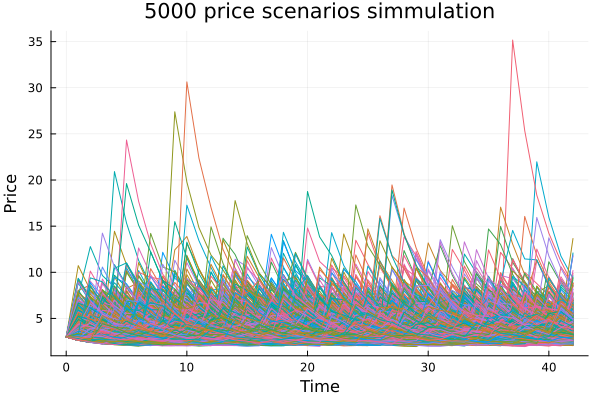

In [16]:
using Distributions
using Plots

μ = -1.2
σ = 1.0
α = 0.7
β = 0.5
n_paths = 5000
periods = build_years + life_years

dist_err = LogNormal(μ, σ)

prices = zeros(n_paths, periods)
prices[:, 1] .= pi0

for i in 1:n_paths
    for t in 2:periods
        prices[i, t] = β + α * prices[i, t-1] + rand(dist_err)
    end
end

pc = plot(collect(0:periods-1), prices', legend=false, xlabel="Time", ylabel="Price",
     title="5000 price scenarios simmulation")

display(pc)
savefig(pc, "q4f_cenarios.png");

##### Questão 4 - Item G

In [23]:
P = ones(n_paths) / n_paths
opt_cap = []

for q in 0:Qmax
    build_flow = sum(Ibar * q / (1 + r)^t for t in 0:(build_years - 1)) + 
                 sum(P[i] * sum(((prices[i, t+1] - c0) * Q0)/ (1 + r)^t for t in 0:(build_years - 1)) for i in 1:n_paths)
    prod_flow = sum(P[i] * sum((prices[i, t+1] * q - 0.01 * q^2)/ (1 + r)^t for t in build_years:(build_years + life_years - 1)) for i in 1:n_paths) + 
                sum(P[i] * sum(((prices[i, t+1] - c0) * Q0)/ (1 + r)^t for t in build_years:(build_years + life_years - 1)) for i in 1:n_paths)
    append!(opt_cap, build_flow + prod_flow)
end

max_VP, max_idx = findmax(opt_cap)
Q_optimal = max_idx - 1

# Print the optimal production quantity
println("Optimal production quantity (Q*): ", Q_optimal)
println("Expected PV for Optimal production quantity (Q*): ", max_VP)

println(opt_cap)


Optimal production quantity (Q*): 28
Expected PV for Optimal production quantity (Q*): 4306.809122655984
Any[4188.17869490132, 4196.6177211221075, 4204.745471399965, 4212.561945734895, 4220.067144126892, 4227.26106657596, 4234.143713082102, 4240.715083645311, 4246.97517826559, 4252.923996942942, 4258.561539677362, 4263.887806468854, 4268.902797317419, 4273.606512223048, 4277.998951185751, 4282.080114205523, 4285.850001282368, 4289.308612416282, 4292.455947607265, 4295.292006855319, 4297.816790160447, 4300.03029752264, 4301.932528941905, 4303.5234844182405, 4304.803163951653, 4305.771567542129, 4306.428695189677, 4306.774546894288, 4306.809122655984, 4306.5324224747355, 4305.94444635057, 4305.045194283466, 4303.834666273436, 4302.3128623204775, 4300.479782424585, 4298.335426585776, 4295.879794804018, 4293.112887079347, 4290.03470341173, 4286.6452438011975, 4282.944508247726, 4278.9324967513385, 4274.609209312008, 4269.974645929751, 4265.028806604563, 4259.771691336449, 4254.203300125402

##### Questão 4 - Item H

In [26]:
PV_neg_Q_optimal = sum(#sum(((prices[i, t+1] - 1) * Q0) / (1 + r)^t for t in 0:42) + #f1 flow
                       sum(Ibar * Q_optimal / (1 + r)^t for t in 0:2) +          
                       sum((prices[i, t+1] * Q_optimal - 0.01 * Q_optimal^2) / (1 + r)^t for t in 3:42) < 0 for i in 1:n_paths) / n_paths

PV_neg_Q_intuitivo = sum(#sum(((prices[i, t+1] - 1) * Q0) / (1 + r)^t for t in 0:42) + #f1 flow
                         sum(Ibar * Q_intuitivo / (1 + r)^t for t in 0:2) + 
                         sum((prices[i, t+1] * Q_intuitivo - 0.01 * Q_intuitivo^2) / (1 + r)^t for t in 3:42) < 0 for i in 1:n_paths) / n_paths

println("Negative PV probability for the optimal expansion under uncertainty  Q* = $Q_optimal: ", PV_neg_Q_optimal)
println("Negative PV probability for Q_intuitivo = $Q_intuitivo: ", PV_neg_Q_intuitivo)

Negative PV probability for the optimal expansion under uncertainty  Q* = 28: 0.2314
Negative PV probability for Q_intuitivo = 200: 0.996


In [27]:
PV_neg_Q_optimal = sum(sum(((prices[i, t+1] - 1) * Q0) / (1 + r)^t for t in 0:42) + #f1 flow
                       sum(Ibar * Q_optimal / (1 + r)^t for t in 0:2) +          
                       sum((prices[i, t+1] * Q_optimal - 0.01 * Q_optimal^2) / (1 + r)^t for t in 3:42) < 0 for i in 1:n_paths) / n_paths

PV_neg_Q_intuitivo = sum(sum(((prices[i, t+1] - 1) * Q0) / (1 + r)^t for t in 0:42) + #f1 flow
                         sum(Ibar * Q_intuitivo / (1 + r)^t for t in 0:2) + 
                         sum((prices[i, t+1] * Q_intuitivo - 0.01 * Q_intuitivo^2) / (1 + r)^t for t in 3:42) < 0 for i in 1:n_paths) / n_paths

println("Negative PV probability for the optimal expansion under uncertainty  Q* = $Q_optimal: ", PV_neg_Q_optimal)
println("Negative PV probability for Q_intuitivo = $Q_intuitivo: ", PV_neg_Q_intuitivo)

Negative PV probability for the optimal expansion under uncertainty  Q* = 28: 0.0
Negative PV probability for Q_intuitivo = 200: 0.6288


##### Questão 4 - Item I

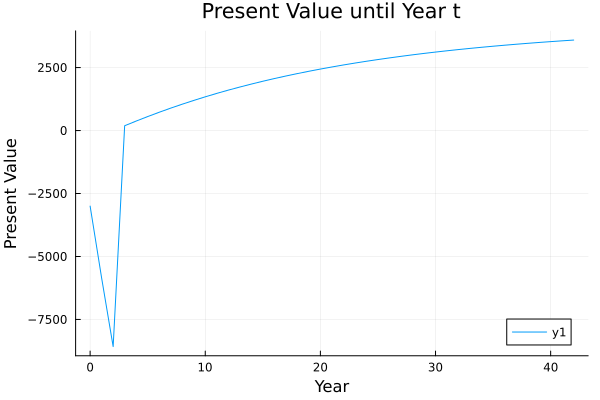

Payback period: Year 3


In [38]:
I = Ibar * Q_optimal
payback_period = 0
cumulative_cash_flow = 0.0

# Calculate discounted cash flows and accumulate them until the cumulative cash flow becomes positive
for t in 1: (build_years + life_years - 1)
    if t <= (build_years - 1)
        discounted_cash_flow = I / (1 + r)^t
    else
        discounted_cash_flow = (Q_optimal * prices[:, t] .- 0.01 * Q_optimal^2) / (1 + r)^t
    end

    cumulative_cash_flow += sum(discounted_cash_flow)
    if cumulative_cash_flow >= -I
        payback_period = t
        break
    end
end

# Print the payback period
if payback_period > 0
    println("Payback period: Year ", payback_period)
else
    println("Payback period not reached within the analysis horizon.")
end

present_value = zeros(build_years+life_years)
for t in 0:(build_years+life_years-1)
    if t <= (build_years - 1)
        present_value[t+1] = sum(i / (1 + r)^j for j in 0:t)
    else
        present_value[t+1] = sum(P[i] * sum(((prices[i, t+1] - c0) * Q0)/ (1 + r)^t for t in build_years:t) for i in 1:n_paths)
    end
end

p_i = plot(0:(build_years+life_years-1), present_value, xlabel="Year", ylabel="Present Value",
     title="Present Value until Year t")

display(p_i)
savefig(p_i, "q4i_payback.png");
